## Anisotropic Fast Marching Methods ##
Experimenting with finding the shortest path through an anisotropic medium.

Papers being referenced: 
- https://hal.archives-ouvertes.fr/hal-01778322/document
- https://hal.archives-ouvertes.fr/hal-01507334v4/document

GitHub repository with source algorithm: 
- https://github.com/Mirebeau/AdaptiveGridDiscretizations

Demo Jupyter Notebooks:
- https://nbviewer.jupyter.org/github/Mirebeau/AdaptiveGridDiscretizations/blob/master/Notebooks_FMM/Riemannian.ipynb



### Setup ###
First install the package:<br>
`conda install agd -c agd-lbr`

In [4]:
from agd import Eikonal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Isotropic Fast Marching example ###
Simple explanation here: https://math.berkeley.edu/~sethian/2006/Explanations/fast_marching_explain.html

In [6]:
hfmIn = Eikonal.dictIn({   # Create a dictionary-like structure to store the input data
    'model': 'Isotropic2', # Isotropic two-dimensional eikonal equation
    'order':  2.,          # Use a second order scheme, so as to increase accuracy
    'cost':   1.           # Unit cost for now. A position dependent cost function is also considered below.
    #'speed': 1.           # One may equivalently provide a speed function. In that case cost = 1/speed.
})
hfmIn

dictIn({'arrayOrdering': 'RowMajor', 'model': 'Isotropic2', 'order': 2.0, 'cost': array(1.)})

dictIn({'arrayOrdering': 'RowMajor', 'model': 'Isotropic2', 'order': 2.0, 'cost': array(1.), 'gridScale': array(0.01), 'dims': array([200., 100.]), 'origin': array([-1.,  0.])})

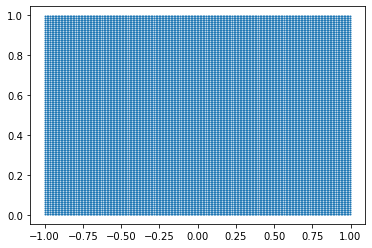

In [16]:
hfmIn.SetRect(sides=[[-1,1],[0,1]],gridScale=0.01)  #create a grid with sides [xmin,xmax],[ymin,ymax] and dims (height/gridScale, width/gridScale)
X,Y = hfmIn.Grid()                                  #create a coordinate system (two arrays of the X and Y values (respectively) at each point in the grid)
plt.scatter(X,Y, s=1)                               #visualize the grid
hfmIn

In [20]:
hfmIn.update({
    'seeds':[[-0.5,0.3],[0.5,0.8]],  # Introduce seeds, at positions [[x1,y1],[x2,y2],...] (will be rounded to closest grid point)
    'seedValues':[0.,0.5],           # Boundary conditions imposed at the seeds. (?)
    # 'seedValues' defaults [0.,0.] if unspecified. 
})
index,rounding_error = hfmIn.IndexFromPoint(hfmIn['seeds'])  #get rounded indices of seeds in grid
print(f"Seed grid indices rounded to {index}, with rounding errors {rounding_error}")
print(f"Rounded positions {hfmIn.PointFromIndex(index)}, original positions {hfmIn.PointFromIndex(index+rounding_error)}") #get back original positions if needed

hfmIn

Seed grid indices rounded to [[ 50  29]
 [150  80]], with rounding errors [[-0.5  0.5]
 [-0.5 -0.5]]
Rounded positions [[-0.495  0.295]
 [ 0.505  0.805]], original positions [[-0.5  0.3]
 [ 0.5  0.8]]


dictIn({'arrayOrdering': 'RowMajor', 'model': 'Isotropic2', 'order': 2.0, 'cost': array(1.), 'gridScale': array(0.01), 'dims': array([200., 100.]), 'origin': array([-1.,  0.]), 'seeds': array([[-0.5,  0.3],
       [ 0.5,  0.8]]), 'seedValues': array([0. , 0.5])})

In [22]:
#Indicate desired outputs:
hfmIn['exportValues'] = 1.         # Ask for the PDE solution
hfmIn['exportGeodesicFlow'] = 1    # Ask for the geodesic flow 
hfmIn

dictIn({'arrayOrdering': 'RowMajor', 'model': 'Isotropic2', 'order': 2.0, 'cost': array(1.), 'gridScale': array(0.01), 'dims': array([200., 100.]), 'origin': array([-1.,  0.]), 'seeds': array([[-0.5,  0.3],
       [ 0.5,  0.8]]), 'seedValues': array([0. , 0.5]), 'exportValues': 1.0, 'exportGeodesicFlow': 1})

In [23]:
hfmIn['tips'] = [[0.,0.6],[-0.9,0.5],[0.8,0.8]] # Ask for the geodesics from specified points

In [24]:
# Run the solver:
hfmOut = hfmIn.Run()

ERROR :ERROR : the HFMpy library is not found, and the path to the FileHFM binaries is not set

You can set the path to the FileHFM compiled binaries, as follows : 

>>> agd.Eikonal.LibraryCall.FileHFM_binary_dir = 'path/to/FileHFM/bin'



In order to do this automatically in the future, please set this path 
in the first line of a file named 'FileHFM_binary_dir.txt' in the current directory

>>> with open('FileHFM_binary_dir.txt','w+') as file: file.write('path/to/FileHFM/bin')



FileNotFoundError: [Errno 2] No such file or directory: 'FileHFM_binary_dir.txt'